In [1]:
%matplotlib widget

from IPython.display import display, Latex
import pandas as pd

import sympy
from sympy.abc import U, omega, t
from sympy.simplify.fu import TR8

from visual import disp, plot
import calc

In [2]:
a_0 = sympy.Symbol('a_0')
a_1 = sympy.Symbol('a_1')
_u = sympy.Symbol('\\breve{u}', real=True, positive=True)
G = a_0 * (a_1 - U)
disp(G)
u = _u * sympy.sin(omega * t)
disp(u)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
G = G.subs([(a_0, 5E-4), (a_1, 4)])
disp(G)

<IPython.core.display.Latex object>

In [4]:
#1
f = 1
i = (u * G).subs([(U, u), (omega, 2 * sympy.pi * f)])
disp(i)
i = TR8(i.expand()).expand()
disp(i)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

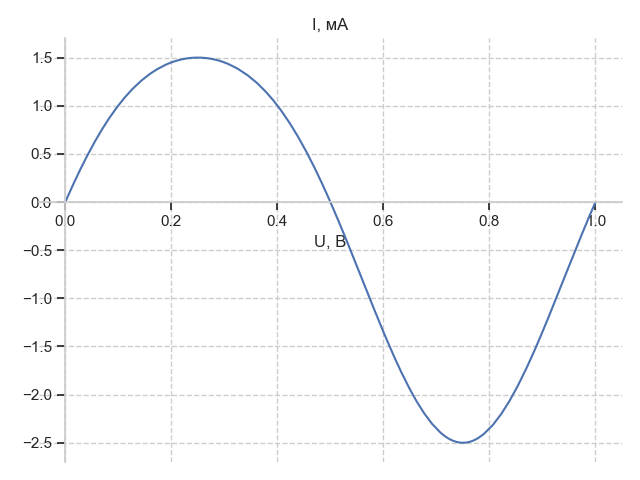

In [5]:
I = i.subs(_u, 1)
disp(I)
plot(I, (t, 0, 1))

In [6]:
#2
T = 1 / f
I_0 = sympy.integrate(I, (t, 0, T)) / T
disp(I_0)

<IPython.core.display.Latex object>

In [7]:
ihs = calc.harmonics(I, n=2, limits=(t, 0, T))
disp(ihs)

<IPython.core.display.Latex object>

In [8]:
k = calc.distortion_coeff(calc.effective([ihs[1]]), calc.effective(ihs[1:]))
disp(k)

<IPython.core.display.Latex object>

In [9]:
#3
_ulim = (_u, 0, 2)
ihsu = calc.harmonics(i, n=2, limits=(t, 0, T))
disp(ihsu)

<IPython.core.display.Latex object>

In [10]:
ku = calc.distortion_coeff(calc.effective([ihsu[1]]), calc.effective(ihsu[1:]))
ku = ku.simplify()
disp(ku)

<IPython.core.display.Latex object>

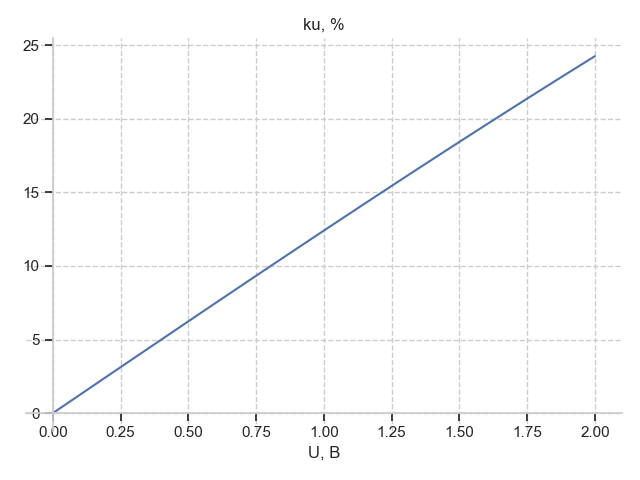

In [11]:
plot(ku, _ulim)